# Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Import and prepare Data

In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# using one hot encoding to change catagorical variable to numarical
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Splitting Data

In [13]:
X = df.drop(columns=["Exited"])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\jaydo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Bulding Model

In [36]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim = 11))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [38]:
# compile model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 0.5967 - accuracy: 0.6825 - val_loss: 0.4816 - val_accuracy: 0.8006
Epoch 2/100
200/200 [==============================] - 0s 912us/step - loss: 0.4606 - accuracy: 0.7972 - val_loss: 0.4505 - val_accuracy: 0.8019
Epoch 3/100
200/200 [==============================] - 0s 917us/step - loss: 0.4418 - accuracy: 0.8061 - val_loss: 0.4373 - val_accuracy: 0.8087
Epoch 4/100
200/200 [==============================] - 0s 896us/step - loss: 0.4294 - accuracy: 0.8152 - val_loss: 0.4255 - val_accuracy: 0.8094
Epoch 5/100
200/200 [==============================] - 0s 914us/step - loss: 0.4174 - accuracy: 0.8269 - val_loss: 0.4122 - val_accuracy: 0.8238
Epoch 6/100
200/200 [==============================] - 0s 914us/step - loss: 0.4042 - accuracy: 0.8338 - val_loss: 0.3987 - val_accuracy: 0.8306
Epoch 7/100
200/200 [==============================] - 0s 900us/step - loss: 0.3906 - accuracy: 0.8394 - val_loss: 0.3860 - val_accu

In [32]:
model.layers[0].get_weights()

[array([[ 0.06070222, -0.00932938, -0.40348253, -0.23869006,  0.0443157 ,
          0.04427003,  0.21595523, -0.08651247,  0.00242188, -0.18607247,
          0.38852233],
        [-0.74704283, -0.05605424,  0.9525276 ,  0.07984636, -0.3909322 ,
         -0.0288563 , -0.3803932 , -0.00439621,  0.57357144,  0.21406071,
          1.0803882 ],
        [-0.10511701, -0.02096468,  0.2359274 ,  0.41992265, -0.0428974 ,
         -0.1520628 , -0.0181281 ,  0.05363677, -0.02734527,  0.09254415,
         -0.2171094 ],
        [ 0.14880612, -0.88028306, -0.48665994, -0.11102257,  0.60505605,
         -0.80060387, -0.5693887 ,  0.09736869, -0.30571735,  0.07397056,
          0.30340242],
        [ 0.0238586 ,  0.43401662,  0.02819453, -0.16275951, -0.265323  ,
          0.16951264, -0.5032784 ,  0.89281565, -0.810726  ,  1.1170225 ,
          1.0150231 ],
        [-0.11020664,  0.01400338,  0.29324472, -0.48889428,  0.658317  ,
          0.19597417, -0.28128564, -0.14715913, -0.22820556,  0.3006854

In [33]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 551us/step


In [34]:
y_pred = np.where(y_log>0.5, 1, 0)

In [35]:
accuracy_score(y_test, y_pred)

0.795

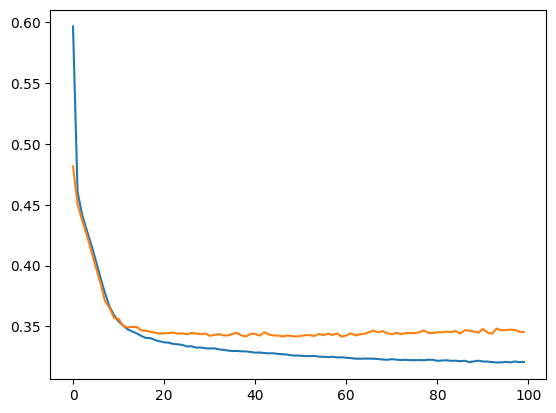

In [42]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

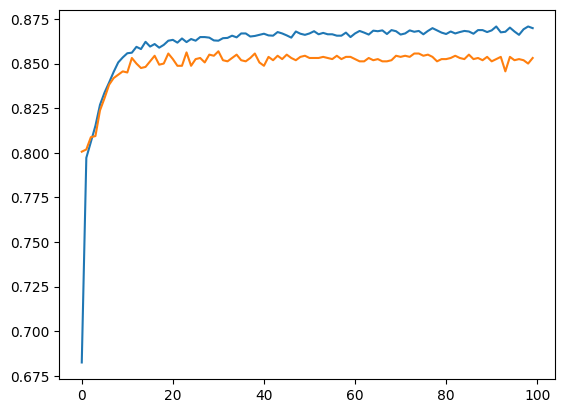

In [43]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])